# Exploratory Data Analysis

### [RQ1] In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day.

In [1]:
import pandas as pd

def month_avg(x, m_len):                            
    return x['PULocationID'].shape[0] / m_len

month_len = (31, 28, 31, 30, 31, 30)
avg_trips_per_day = []
avg_trips_per_borough = []
for i in range(1, 7):
    data = pd.read_csv('/home/wuj/Scaricati/yellow_tripdata_2018-0' + str(i) + '.csv', parse_dates=[1,2])
    total_trips = len(data)
    avg_trips_per_day.append(total_trips / month_len[i-1])
    
    avg_trips_per_borough.append(data.groupby('PULocationID').apply(month_avg, (month_len[i-1])))


([<matplotlib.axis.XTick at 0x7f746d993a20>,
 <a list of 6 Text xticklabel objects>)

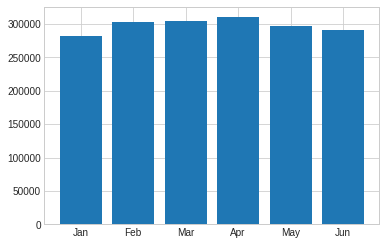

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')
y_pos = np.arange(len(months))
plt.bar(y_pos, avg_trips_per_day)

plt.xticks(y_pos, months)

### Due to the differences among New York zones, we want to visualize the same information for each boroughs.

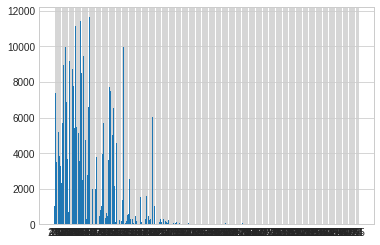

In [23]:
for i in range(1):
    y_pos = np.arange(len(avg_borough_trips[i]))
    plt.bar(y_pos, avg_borough_trips[i])
    plt.xticks(y_pos, borough[i])
    

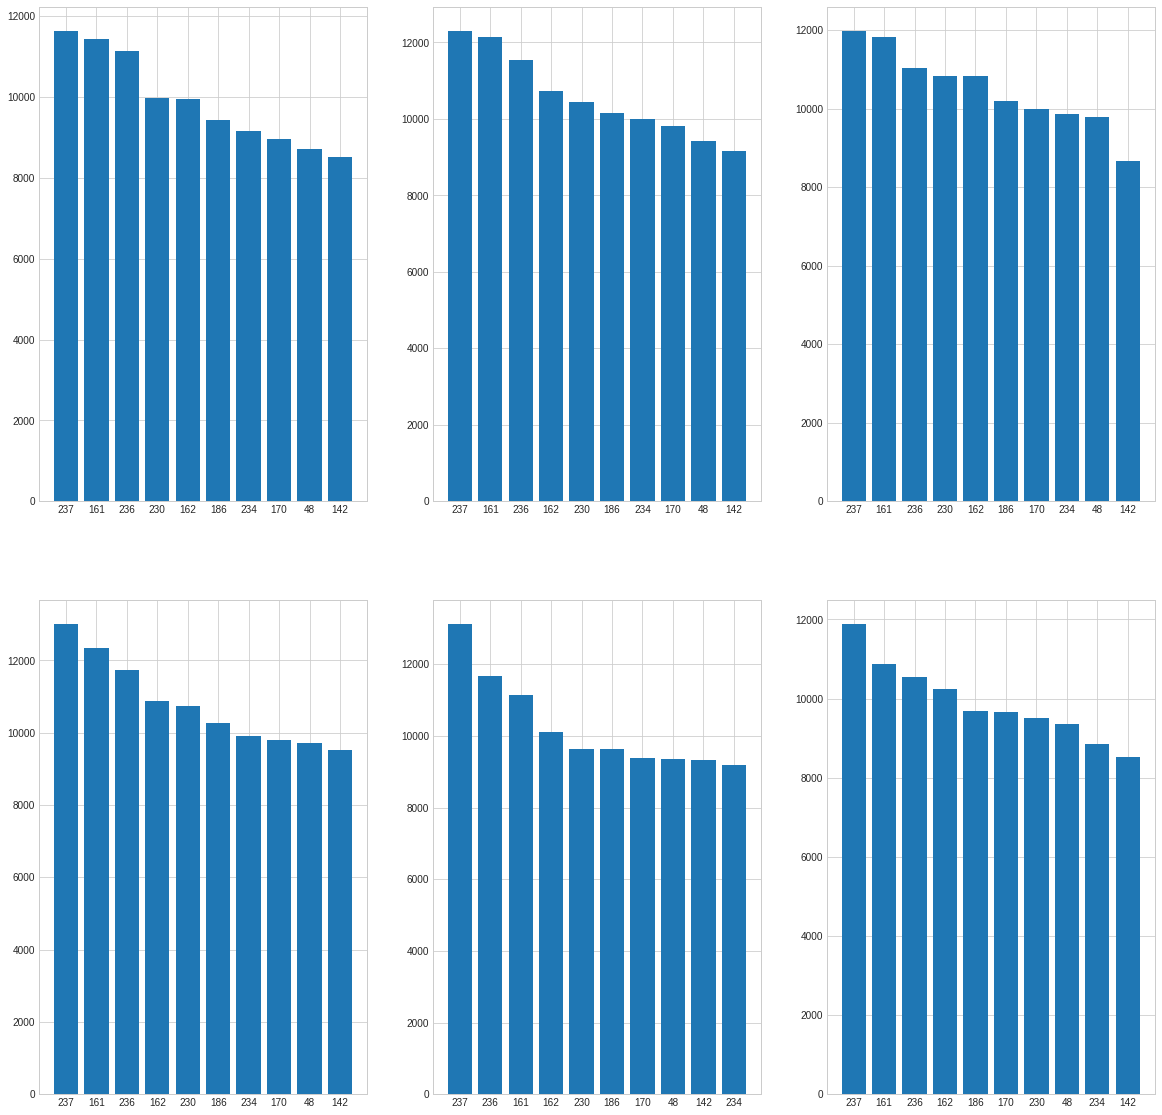

In [28]:
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

n = 10
row = 0
col = 0
for i in range(len(avg_trips_per_borough)):
    if i == ncol:
        row += 1
        col = 0
    highest_vals = avg_trips_per_borough[i].nlargest(n)
    
    x_pos = np.arange(n)
    axes[row, col].bar(x_pos, highest_vals)
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels(highest_vals.index)
    col += 1